<a href="https://www.kaggle.com/code/mosesmoncy/cancer-mortality-rate-prediction?scriptVersionId=126869715" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Cancer continues to be the second most common cause of death in the US, after heart disease. A total of 1.9 million new cancer cases and 609,360 deaths from cancer are expected to occur in the US in 2022, which is about 1,670 deaths a day.

Cancer is a worldwide illness that causes significant morbidity and death and imposes an immense cost on global public health. Modelling such a phenomenon is complex because of the non-stationarity and complexity of cancer waves. Apply modern novel statistical methods directly to raw clinical data. To estimate extreme cancer death rate likelihood at any period in any location of interest. Due to the non-stationarity and complicated nature of cancer, it is challenging to model such a phenomenon.


#avganncount:Mean number of reported cases of cancer diagnosed annually (a)
#avgdeathsperyear:Mean number of reported mortalities due to cancer (a)
#target_deathrate:Dependent variable. Mean per capita (100,000) cancer mortalities (a)
#incidencerate:Mean per capita (100,000) cancer diagnoses (a)
#medincome:Median income per county (b)
#popest2015:Population of county (b)
#povertypercent:Percent of populace in poverty (b)
#studypercap:Per capita number of cancer-related clinical trials per county (a)
#binnedinc:Median income per capita binned by decile (b)
#medianage:Median age of county residents (b)
#medianagemale:Median age of male county residents (b)
#medianagefemale:Median age of female county residents (b)
#geography:County name (b)
#percentmarried:Percent of county residents who are married (b)
#pctnohs18_24:Percent of county residents ages 18-24 highest education attained: less than high school (b)
#pcths18_24:Percent of county residents ages 18-24 highest education attained: high school diploma (b)
#pctsomecol18_24:Percent of county residents ages 18-24 highest education attained: some college (b)
#pctbachdeg18_24:Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
#pcths25_over:Percent of county residents ages 25 and over highest education attained: high school diploma (b)
#pctbachdeg25_over:Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
#pctemployed16_over:Percent of county residents ages 16 and over employed (b)
#pctunemployed16_over:Percent of county residents ages 16 and over unemployed (b)
#pctprivatecoverage:Percent of county residents with private health coverage (b)
#pctprivatecoveragealone:Percent of county residents with private health coverage alone (no public assistance) (b)
#pctempprivcoverage:Percent of county residents with employee-provided private health coverage (b)
#pctpubliccoverage:Percent of county residents with government-provided health coverage (b)
#pctpubliccoveragealone:Percent of county residents with government-provided health coverage alone (b)
#pctwhite:Percent of county residents who identify as White (b)
#pctblack:Percent of county residents who identify as Black (b)
#pctasian:Percent of county residents who identify as Asian (b)
#pctotherrace:Percent of county residents who identify in a category which is not White, Black, or Asian (b)
#pctmarriedhouseholds:Percent of married households (b)
#birthrate:Number of live births relative to number of w

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [2]:
a=pd.read_csv('/kaggle/input/cancer-prediction-dataset/cancer_reg.csv')
a

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [3]:
# read first five data
a.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
# read last five data
a.tail()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [5]:
a.describe

<bound method NDFrame.describe of       avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap           binnedinc  \
0         61898      

In [6]:
a.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [7]:
a.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [8]:
a['pctsomecol18_24'].value_counts()

43.0    10
42.1     8
42.3     8
45.5     7
36.6     7
        ..
72.7     1
53.2     1
46.5     1
24.8     1
43.9     1
Name: pctsomecol18_24, Length: 343, dtype: int64

In [9]:
a['pctemployed16_over'].value_counts()


51.9    20
48.9    20
57.9    20
54.2    19
59.7    19
        ..
34.3     1
73.6     1
32.8     1
35.1     1
68.6     1
Name: pctemployed16_over, Length: 409, dtype: int64

In [10]:
a['pctprivatecoveragealone'].value_counts()

53.0    16
53.8    14
50.6    14
51.7    14
49.6    14
        ..
24.5     1
71.1     1
24.4     1
71.3     1
15.7     1
Name: pctprivatecoveragealone, Length: 459, dtype: int64

In [11]:
# filling these missing values of the above columns with mean()

a['pctsomecol18_24']=a['pctsomecol18_24'].fillna(a['pctsomecol18_24'].mean())
a['pctemployed16_over']=a['pctemployed16_over'].fillna(a['pctemployed16_over'].mean())
a['pctprivatecoveragealone']=a['pctprivatecoveragealone'].fillna(a['pctprivatecoveragealone'].mean())

In [12]:
a.isna().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [13]:
a.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [14]:
# using get_dummies encoding technique

a1=pd.get_dummies(a[['geography','binnedinc']],drop_first=True)

In [15]:
a1

,"geography_Acadia Parish, Louisiana","geography_Accomack County, Virginia","geography_Ada County, Idaho","geography_Adair County, Iowa","geography_Adair County, Kentucky","geography_Adair County, Missouri","geography_Adair County, Oklahoma","geography_Adams County, Colorado","geography_Adams County, Idaho","geography_Adams County, Illinois",...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
a2=pd.concat([a,a1],axis=1)
a2

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,0,0,0,0,0,0,0,0,1,0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,0,0,0,0,0,1,0,0,0,0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,0,0,0,0,0,1,0,0,0,0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,0,0,0,1,0,0,0,0,0,0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,0,0,0,0,1,0,0,0,0,0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,0,0,0,0,0,1,0,0,0,0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,0,0,0,0,0,0,1,0,0,0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
a2.dtypes

avganncount                     float64
avgdeathsperyear                  int64
target_deathrate                float64
incidencerate                   float64
medincome                         int64
                                 ...   
binnedinc_(48021.6, 51046.4]      uint8
binnedinc_(51046.4, 54545.6]      uint8
binnedinc_(54545.6, 61494.5]      uint8
binnedinc_(61494.5, 125635]       uint8
binnedinc_[22640, 34218.1]        uint8
Length: 3088, dtype: object

In [18]:
# dropping 'geography' & 'binnedinc' from a2

a2=a2.drop(['geography','binnedinc'],axis=1)

In [19]:
a.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

<AxesSubplot:xlabel='birthrate', ylabel='Count'>

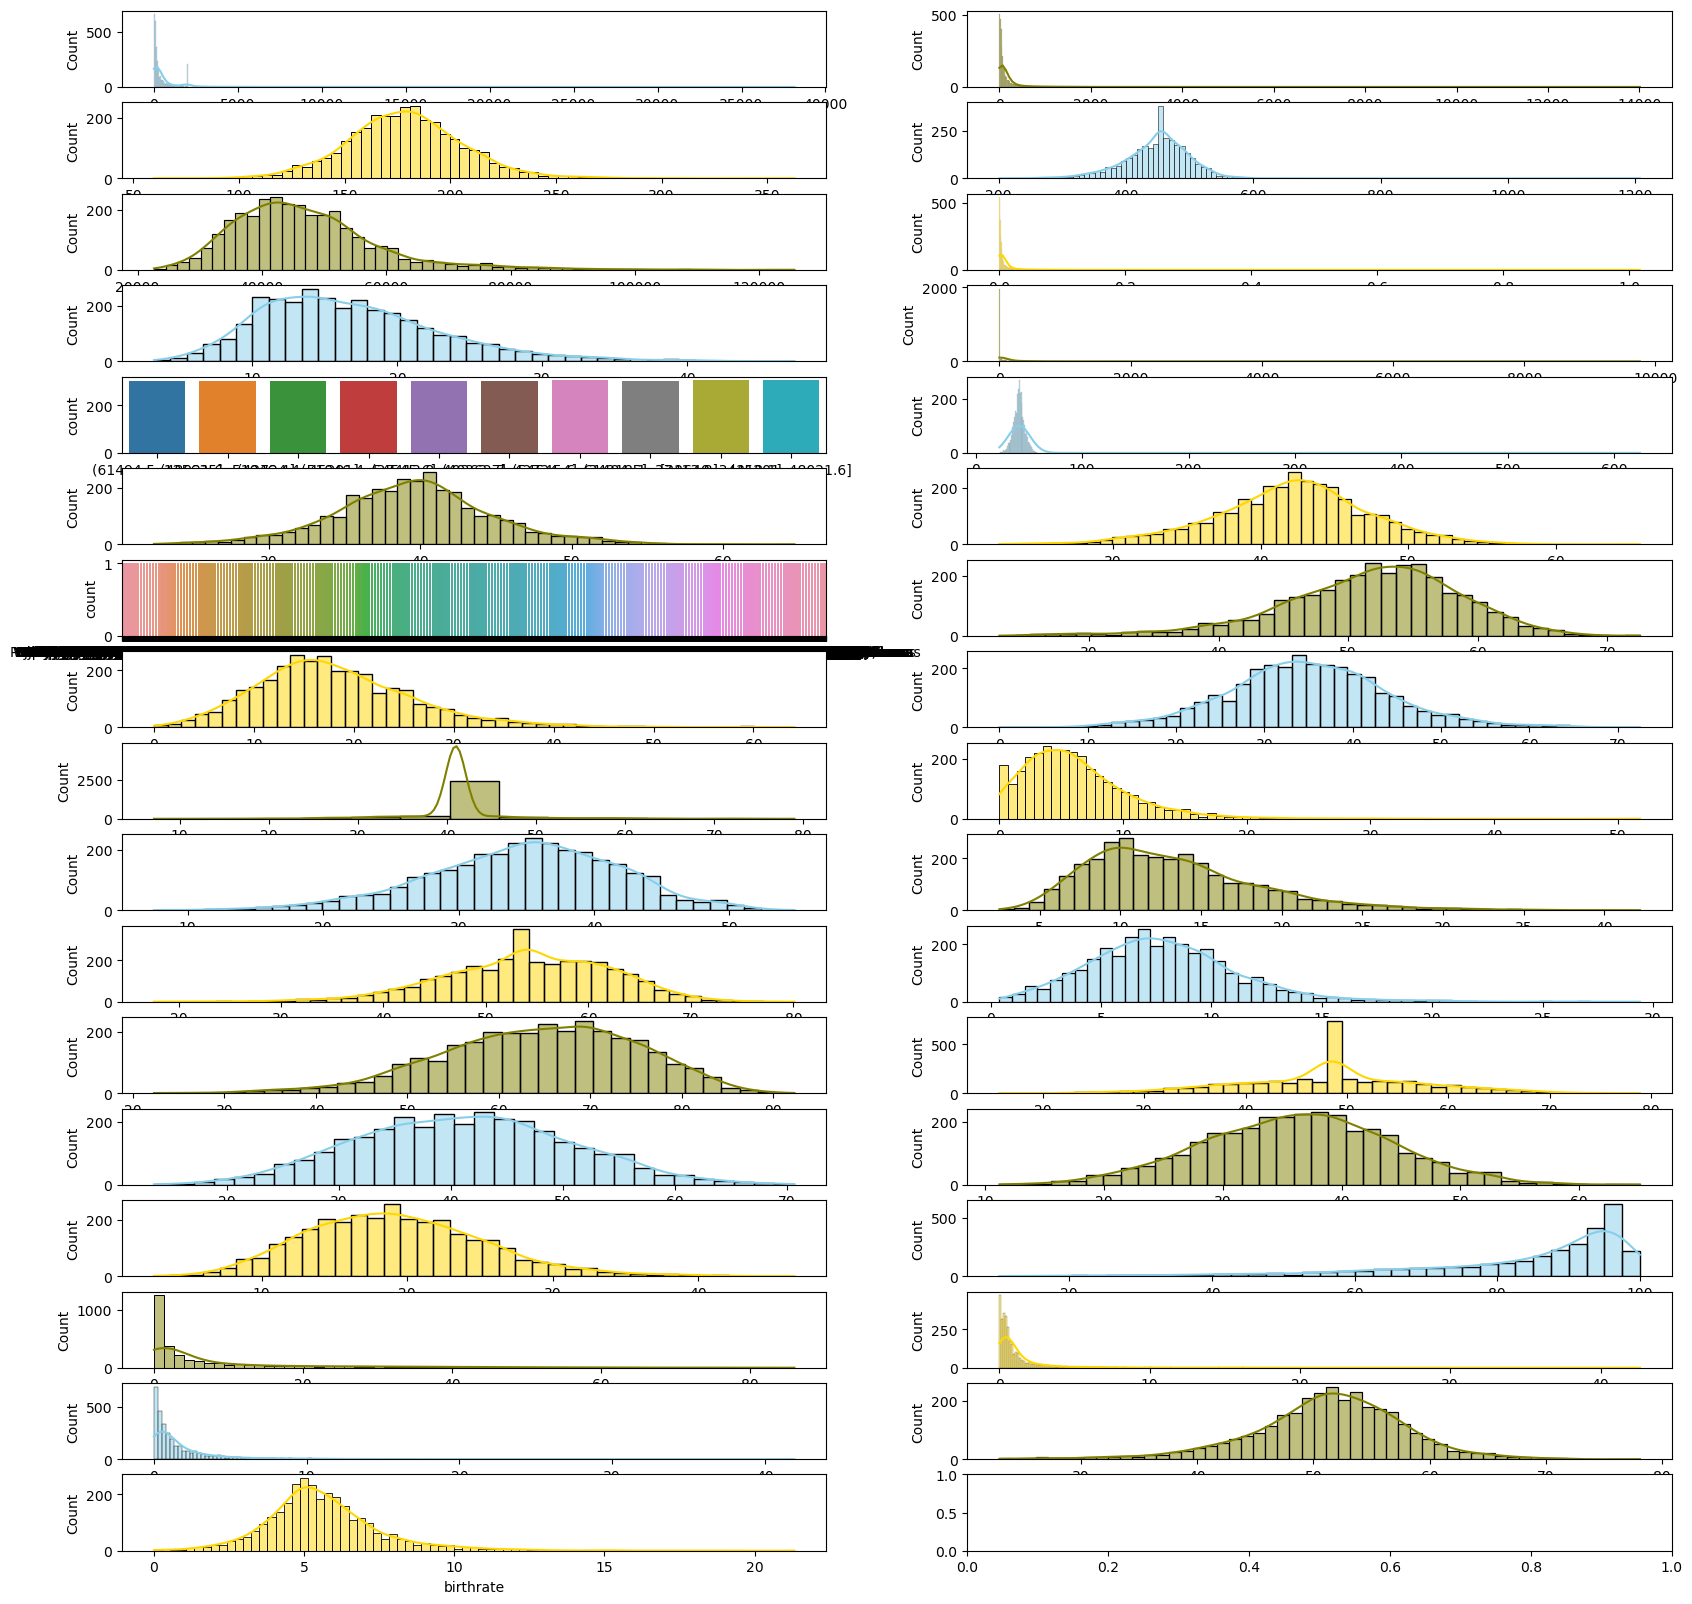

In [20]:
fig, axs = plt.subplots(17, 2, figsize=(20, 20))
sns.histplot(data=a["avganncount"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["avgdeathsperyear"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["target_deathrate"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["incidencerate"], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a["medincome"], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a["popest2015"], kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=a["povertypercent"], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a["studypercap"], kde=True, color="olive", ax=axs[3, 1])
sns.countplot(x=a["binnedinc"], ax=axs[4, 0])
sns.histplot(data=a["medianage"], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a["medianagemale"], kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=a["medianagefemale"], kde=True, color="gold", ax=axs[5, 1])
sns.countplot(x=a["geography"], ax=axs[6, 0])
sns.histplot(data=a["percentmarried"], kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=a["pctnohs18_24"], kde=True, color="gold", ax=axs[7, 0])
sns.histplot(data=a["pcths18_24"], kde=True, color="skyblue", ax=axs[7, 1])
sns.histplot(data=a["pctsomecol18_24"], kde=True, color="olive", ax=axs[8, 0])
sns.histplot(data=a["pctbachdeg18_24"], kde=True, color="gold", ax=axs[8, 1])
sns.histplot(data=a["pcths25_over"], kde=True, color="skyblue", ax=axs[9, 0])
sns.histplot(data=a["pctbachdeg25_over"], kde=True, color="olive", ax=axs[9, 1])
sns.histplot(data=a["pctemployed16_over"], kde=True, color="gold", ax=axs[10, 0])
sns.histplot(data=a["pctunemployed16_over"], kde=True, color="skyblue", ax=axs[10, 1])
sns.histplot(data=a["pctprivatecoverage"], kde=True, color="olive", ax=axs[11, 0])
sns.histplot(data=a["pctprivatecoveragealone"], kde=True, color="gold", ax=axs[11, 1])
sns.histplot(data=a["pctempprivcoverage"], kde=True, color="skyblue", ax=axs[12, 0])
sns.histplot(data=a["pctpubliccoverage"], kde=True, color="olive", ax=axs[12, 1])
sns.histplot(data=a["pctpubliccoveragealone"], kde=True, color="gold", ax=axs[13, 0])
sns.histplot(data=a["pctwhite"], kde=True, color="skyblue", ax=axs[13, 1])
sns.histplot(data=a["pctblack"], kde=True, color="olive", ax=axs[14, 0])
sns.histplot(data=a["pctasian"], kde=True, color="gold", ax=axs[14, 1])
sns.histplot(data=a["pctotherrace"], kde=True, color="skyblue", ax=axs[15, 0])
sns.histplot(data=a["pctmarriedhouseholds"], kde=True, color="olive", ax=axs[15, 1])
sns.histplot(data=a["birthrate"], kde=True, color="gold", ax=axs[16, 0])



In [21]:
# splitting x(inputs) and y(outputs)

x=a2.drop(['target_deathrate'],axis=1)
y=a2["target_deathrate"]
x

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,...,0,0,0,0,0,0,0,0,1,0
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,0,0,0,0,0,1,0,0,0,0
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,...,0,0,0,0,0,1,0,0,0,0
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,0,0,0,1,0,0,0,0,0,0
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,...,0,0,0,0,1,0,0,0,0,0
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,...,0,0,0,0,0,1,0,0,0,0
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,...,0,0,0,0,0,0,1,0,0,0
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,39.0,36.9,40.5,...,0,0,0,0,0,1,0,0,0,0


In [22]:
y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64

In [23]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
538,93.000000,42,420.000000,32744,13445,22.0,0.000000,48.1,45.9,50.4,...,0,0,0,0,0,0,0,0,0,1
1295,1962.667684,6,453.549422,45341,2591,12.0,0.000000,49.8,49.0,51.9,...,0,0,0,0,1,0,0,0,0,0
1127,155.000000,65,434.300000,45158,26224,13.1,0.000000,44.4,42.9,45.9,...,0,0,0,1,0,0,0,0,0,0
2840,309.000000,152,409.000000,34354,56486,24.6,0.000000,43.6,42.4,44.9,...,0,0,0,0,0,0,0,0,0,0
1090,20.000000,7,307.100000,57242,4691,9.6,0.000000,52.9,51.2,53.5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,0,0,1,0,0,0,0,0,0,0
1095,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,0,0,0,0,0,0,0,1,0,0
1130,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,0,0,0,0,0,1,0,0,0,0
1294,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,0,0,0,0,0,1,0,0,0,0


In [24]:
y_train

538     184.1
1295    134.0
1127    174.0
2840    193.2
1090    106.1
        ...  
1638    201.5
1095    160.0
1130    160.0
1294    136.2
860     193.2
Name: target_deathrate, Length: 2132, dtype: float64

In [25]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
1582,674.971196,272.869766,476.845435,44358.214981,120546.968155,18.778893,8.586512,39.620505,38.955460,40.742175,...,0.033077,0.350285,0.294446,-1.972997,0.336361,0.326203,0.334344,0.322086,0.348315,0.369657
2367,780.908840,266.879569,450.157843,47965.929976,208860.757825,21.754414,587.972460,29.678915,30.403560,32.906723,...,0.033077,0.350285,0.294446,0.336361,-1.972997,0.326203,0.334344,0.322086,0.348315,0.369657
2091,1298.604123,445.587099,507.555789,71883.040549,226248.716414,8.662121,26.771936,41.862236,40.649705,42.761622,...,0.033077,0.350285,0.294446,0.336361,0.336361,0.326203,0.334344,0.322086,-1.870962,0.369657
343,88.316503,37.255369,483.713565,37961.720298,9259.233200,15.888387,0.308522,54.337958,51.460597,52.454965,...,0.033077,-1.854820,0.294446,0.336361,0.336361,0.326203,0.334344,0.322086,0.348315,0.369657
2661,281.202969,114.129558,457.516554,49697.793160,75370.075749,13.592984,0.308522,35.039576,34.195441,37.349505,...,0.033077,0.350285,0.294446,0.336361,0.336361,-2.065571,0.334344,0.322086,0.348315,0.369657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,131.291208,56.224324,493.328948,46001.085196,20872.205542,15.633342,0.308522,43.909035,42.263271,44.296401,...,0.033077,0.350285,0.294446,0.336361,-1.972997,0.326203,0.334344,0.322086,0.348315,0.369657
229,1141.696479,406.650822,375.098991,91882.460616,451720.179427,8.662121,20.190222,34.259844,34.518154,36.137837,...,0.033077,0.350285,0.294446,0.336361,0.336361,0.326203,0.334344,0.322086,-1.870962,0.369657
2548,120.297679,70.201450,459.871342,28648.456036,24620.196616,32.296261,0.308522,33.772511,32.662553,36.541726,...,0.033077,0.350285,0.294446,0.336361,0.336361,0.326203,0.334344,0.322086,0.348315,-1.705214
2933,91.314738,40.250467,427.296781,52581.565345,14977.219582,13.507970,0.308522,48.197564,45.571081,48.092960,...,0.033077,0.350285,0.294446,0.336361,0.336361,0.326203,-1.990928,0.322086,0.348315,0.369657


In [26]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)



Mean Absolute Error is 60890.57785668051
Mean Squared Error is 28212775627.276543
Root Mean Square Error is 167966.59080685224


In [27]:
# Creating Random Forest Regression 

forest=RandomForestRegressor()
forest.fit(x_train,y_train)

y_pred=forest.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)


Mean Absolute Error is 21.93585792349727
Mean Squared Error is 820.7021890251368
Root Mean Square Error is 28.647900255082167


In [28]:
a.corr()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147824,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


<AxesSubplot:>

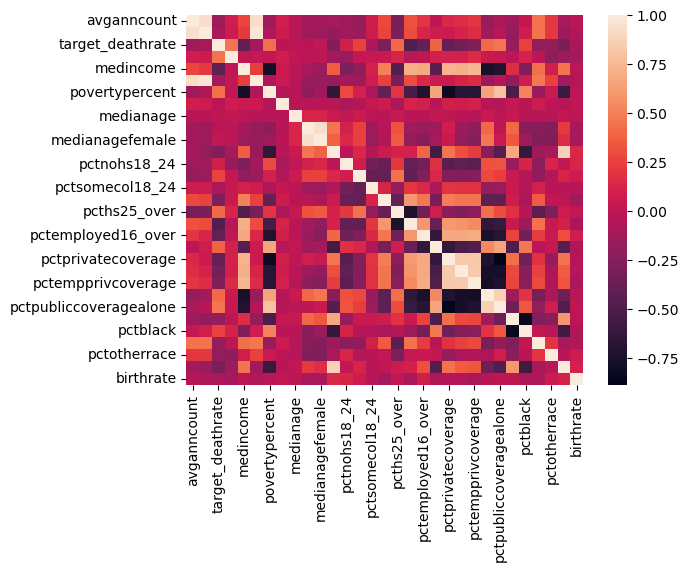

In [29]:
sns.heatmap(a.corr())